Found 12018 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Epoch 1/40


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 2103s 11s/step - accuracy: 0.7028 - loss: 1.8746 - val_accuracy: 0.2500 - val_loss: 3.0028
Epoch 2/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1472s 8s/step - accuracy: 0.8040 - loss: 0.8617 - val_accuracy: 0.2500 - val_loss: 4.2706
Epoch 3/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1452s 8s/step - accuracy: 0.8087 - loss: 0.6540 - val_accuracy: 0.2500 - val_loss: 2.7910
Epoch 4/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1452s 8s/step - accuracy: 0.8381 - loss: 0.4687 - val_accuracy: 0.5675 - val_loss: 1.0646
Epoch 5/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1451s 8s/step - accuracy: 0.8485 - loss: 0.4350 - val_accuracy: 0.6363 - val_loss: 0.9901
Epoch 6/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1472s 8s/step - accuracy: 0.8581 - loss: 0.4080 - val_accuracy: 0.6538 - val_loss: 0.8828
Epoch 7/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1456s 8s/step - accuracy: 0.8685 - loss: 0.3764 - val_accuracy: 0.6513 - val_loss: 0.7447
Epoch 8/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1483s 8s/step - accuracy: 0.8777 - loss: 0.3487 - val_accura

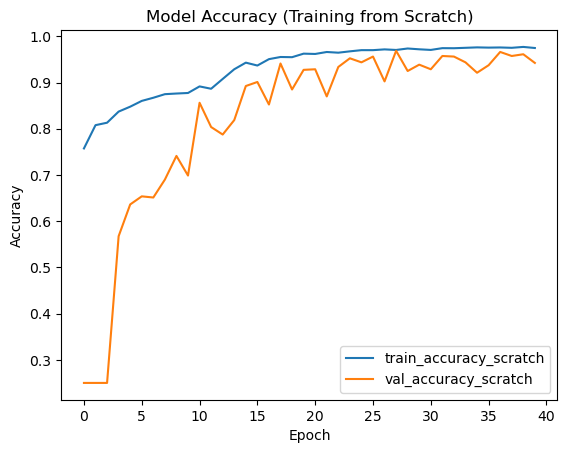

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define dataset directories and parameters
train_dir = r'C:\Users\acer\OneDrive\Desktop\Dataset\TRAIN'
test_dir = r'C:\Users\acer\OneDrive\Desktop\Dataset\TEST'
IMG_SIZE = (224, 224)
BATCH_SIZE = 64
NUM_CLASSES = 4


# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training dataset with labels
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

train_labels = train_generator.classes
train_labels = label_encoder.fit_transform(train_labels)
train_one_hot_labels = to_categorical(train_labels, num_classes=len(classes))

# Load and preprocess test dataset with labels
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_labels = test_generator.classes
test_labels = label_encoder.transform(test_labels)
test_one_hot_labels = to_categorical(test_labels, num_classes=len(classes))

# Define and compile the model for training from scratch
base_model_scratch = EfficientNetB0(
    include_top=True,
    weights=None,  # No pre-trained weights, training from scratch
    classes=NUM_CLASSES,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model_scratch.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model from scratch
history_scratch = base_model_scratch.fit(train_generator, epochs=40, validation_data=test_generator)

# Plot training history for the scratch model
plt.plot(history_scratch.history["accuracy"], label="train_accuracy_scratch")
plt.plot(history_scratch.history["val_accuracy"], label="val_accuracy_scratch")
plt.title("Model Accuracy (Training from Scratch)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Found 12018 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


C:\Users\acer\AppData\Local\Temp\ipykernel_18132\2942883901.py:49: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(display_grid, aspect='auto', cmap='viridis')


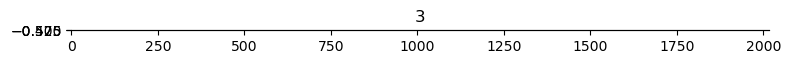

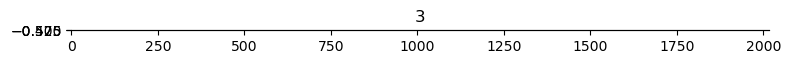

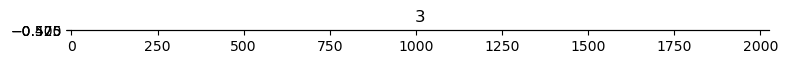

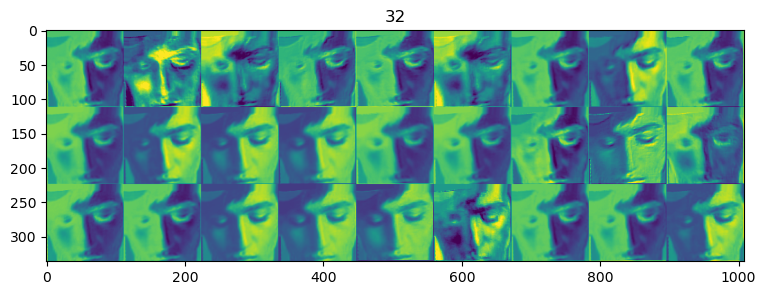

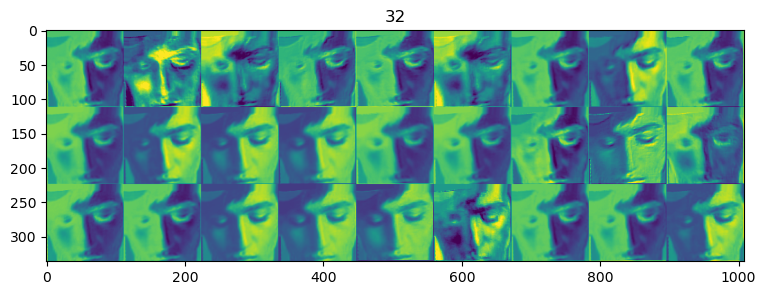

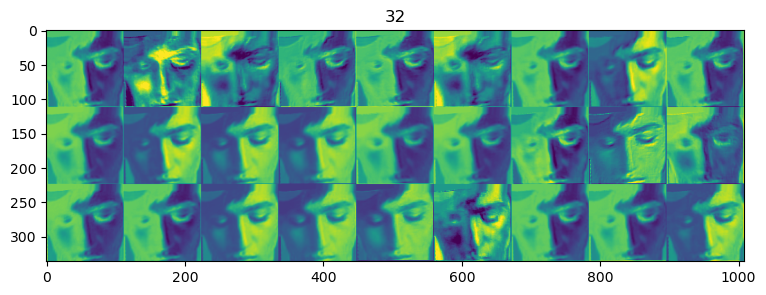

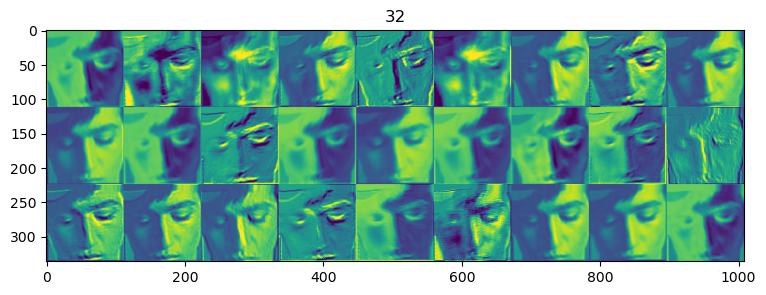

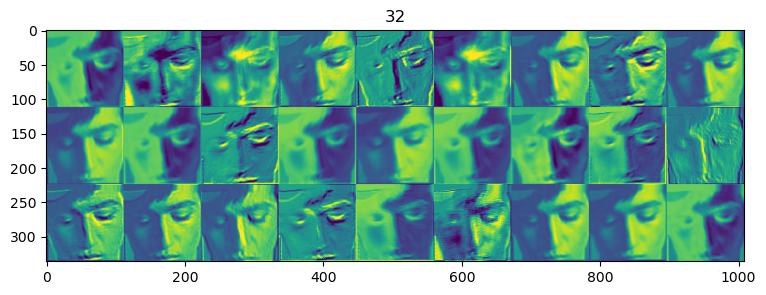

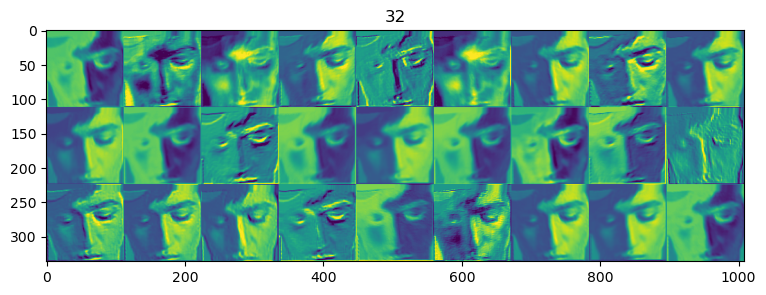

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming you have defined your train_generator
# Load and preprocess training dataset with labels
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

# Visualize feature maps
sample_image, _ = next(iter(train_generator))
sample_image = np.expand_dims(sample_image[0], axis=0)  # Take the first image from the dataset

# Get activations from intermediate layers
layer_outputs = [layer.output for layer in base_model_scratch.layers[1:10]]  # Example: Extracting activations from the first 10 layers

# Create a model that returns the feature maps of intermediate layers
activation_model = tf.keras.models.Model(inputs=base_model_scratch.input, outputs=layer_outputs)

# Get feature maps
activations = activation_model.predict(sample_image)

# Visualize feature maps
images_per_row = 9
for layer_activation in activations:
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_activation.shape[-1])
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


In [ ]:
base_model_scratch.summary()


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_4 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_4               │ (None, 224, 224, 3)       │               7 │ rescaling_4[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ normalization_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_excite (Multiply)  │ (None, 112, 112, 32)      │               

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
!pip install opencv-python



   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 2.0 MB/s eta 0:00:19
   ---------------------------------------- 0.5/38.6 MB 7.6 MB/s eta 0:00:06
   - -------------------------------------- 1.1/38.6 MB 11.7 MB/s eta 0:00:04
   - -------------------------------------- 1.8/38.6 MB 12.4 MB/s eta 0:00:03
   -- ------------------------------------- 2.7/38.6 MB 14.1 MB/s eta 0:00:03
   --- ------------------------------------ 3.7/38.6 MB 16.8 MB/s eta 0:00:03
   ----- ---------------------------------- 4.9/38.6 MB 18.6 MB/s eta 0:00:02
   ------ --------------------------------- 6.0/38.6 MB 20.4 MB/s eta 0:00:02
   ------- -------------------------------- 7.2/38.6 MB 21.0 MB/s eta 0:00:02
   -------- ------------------------------- 8.2/38.6 MB 21.8 MB/s eta 0:00:02
   --------- ------------------------------ 9.5/38.6 MB 23.5 MB/s eta 0:00:02
   ---------- ----------------------------- 10.6/38.6 MB 24.2 MB/s eta 0:0

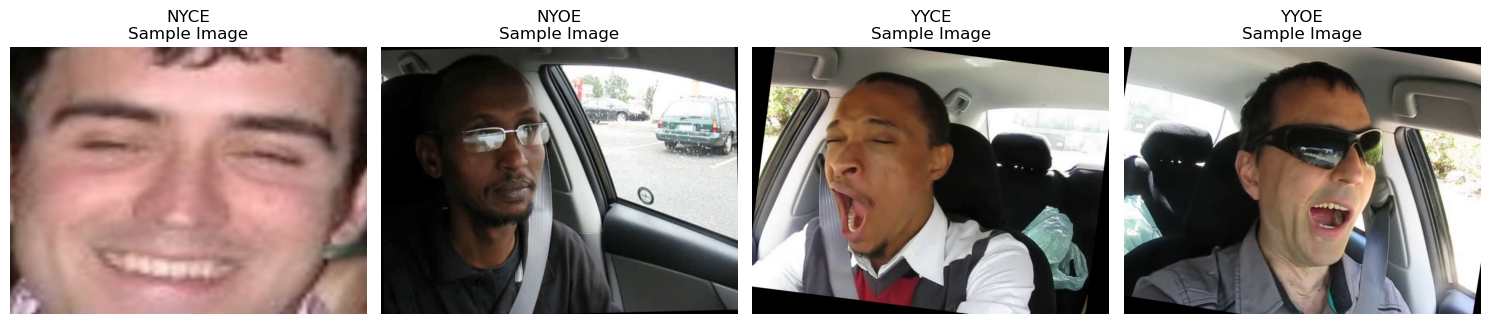

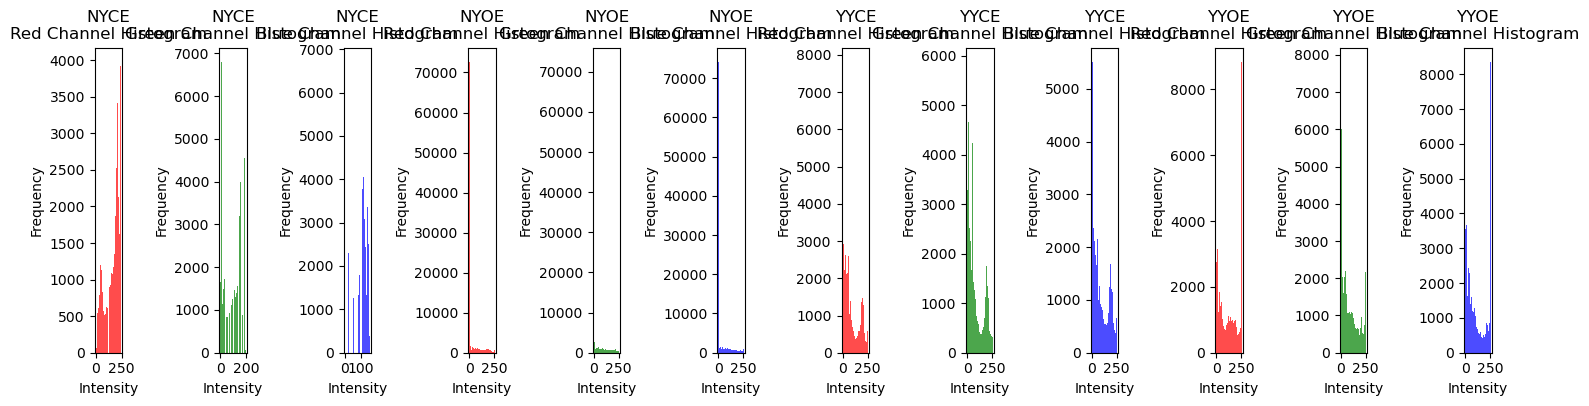

In [ ]:
# Image Channel Histograms
plt.figure(figsize=(15, 8))
for i, class_name in enumerate(classes, 1):
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    sample_image_path = os.path.join(class_dir, np.random.choice(image_files))
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(2, len(classes), i)
    plt.imshow(sample_image)
    plt.title(f'{class_name}\nSample Image')
    plt.axis('off')
plt.tight_layout()  # Ensure proper spacing between subplots

plt.figure(figsize=(15, 8))
for i, class_name in enumerate(classes, 1):
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    sample_image_path = os.path.join(class_dir, np.random.choice(image_files))
    sample_image = cv2.imread(sample_image_path)
    sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    for j, channel in enumerate(['Red', 'Green', 'Blue'], 1):
        plt.subplot(2, 3 * len(classes), len(classes) * 3 + (i - 1) * 3 + j)
        plt.hist(sample_image[..., j-1].ravel(), bins=256, color=channel.lower(), alpha=0.7)
        plt.title(f'{class_name}\n{channel} Channel Histogram')
        plt.xlabel('Intensity')
        plt.ylabel('Frequency')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout parameters to provide more space between subplots
plt.show()


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Define dataset directories and parameters
train_dir = r'C:\Users\acer\OneDrive\Desktop\Dataset\TRAIN'
test_dir = r'C:\Users\acer\OneDrive\Desktop\Dataset\TEST'
IMG_SIZE = (224, 224)
BATCH_SIZE = 64
NUM_CLASSES = 4


# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training dataset with labels
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

train_labels = train_generator.classes
train_labels = label_encoder.fit_transform(train_labels)
train_one_hot_labels = to_categorical(train_labels, num_classes=NUM_CLASSES)


# Load and preprocess test dataset with labels
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_labels = test_generator.classes
test_labels = label_encoder.transform(test_labels)
train_one_hot_labels = to_categorical(train_labels, num_classes=NUM_CLASSES)


# Define and compile the model for training from scratch
base_model_scratch = EfficientNetB0(
    include_top=True,
    weights=None,  # No pre-trained weights, training from scratch
    classes=NUM_CLASSES,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model_scratch.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

Found 12018 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


Epoch 1/40


C:\Users\acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


188/188 ━━━━━━━━━━━━━━━━━━━━ 1181s 6s/step - accuracy: 0.7092 - loss: 0.8553 - val_accuracy: 0.7987 - val_loss: 0.5295
Epoch 2/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1059s 6s/step - accuracy: 0.9243 - loss: 0.2138 - val_accuracy: 0.8938 - val_loss: 0.2401
Epoch 3/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1058s 6s/step - accuracy: 0.9508 - loss: 0.1293 - val_accuracy: 0.7212 - val_loss: 0.7640
Epoch 4/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1059s 6s/step - accuracy: 0.9657 - loss: 0.0932 - val_accuracy: 0.8500 - val_loss: 0.4835
Epoch 5/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1059s 6s/step - accuracy: 0.9692 - loss: 0.0801 - val_accuracy: 0.9513 - val_loss: 0.1198
Epoch 6/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1052s 6s/step - accuracy: 0.9766 - loss: 0.0635 - val_accuracy: 0.9425 - val_loss: 0.1190
Epoch 7/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1055s 6s/step - accuracy: 0.9787 - loss: 0.0588 - val_accuracy: 0.9700 - val_loss: 0.0640
Epoch 8/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 1056s 6s/step - accuracy: 0.9841 - loss: 0.0437 - val_accurac

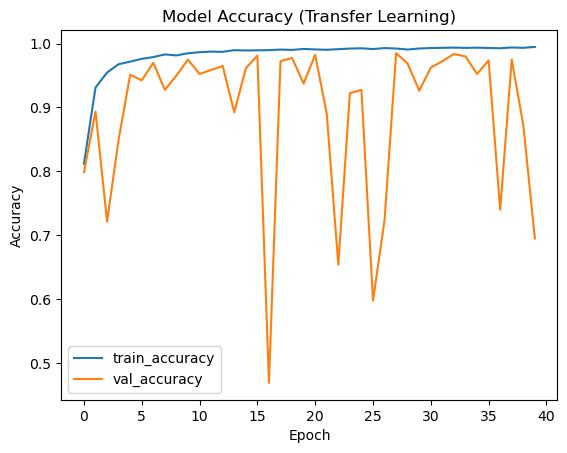

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def build_transfer_model(num_classes, input_shape=(224, 224, 3)):
    # Load EfficientNetV2-B0 base model
    base_model = tf.keras.applications.EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze all layers of the base model
    base_model.trainable = False

    # Add custom head
    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create transfer learning model
    transfer_model = Model(inputs, outputs)

    return transfer_model

# Assuming you have defined ds_train, ds_test, NUM_CLASSES, and IMG_SIZE before
transfer_model = build_transfer_model(num_classes=NUM_CLASSES, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Unfreeze the last 20 layers of the base model
for layer in transfer_model.layers[-20:]:
    if not isinstance(layer, BatchNormalization):
        layer.trainable = True


# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)  # Use learning_rate instead of lr
transfer_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model again

history_transfer = transfer_model.fit(train_generator, epochs=40, validation_data=test_generator)

# Plotting training history
plt.plot(history_transfer.history["accuracy"], label="train_accuracy")
plt.plot(history_transfer.history["val_accuracy"], label="val_accuracy")
plt.title("Model Accuracy (Transfer Learning)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Visualizing feature maps for input_layer:


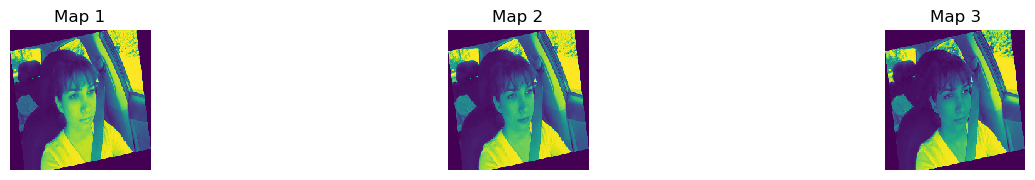

Visualizing feature maps for rescaling:


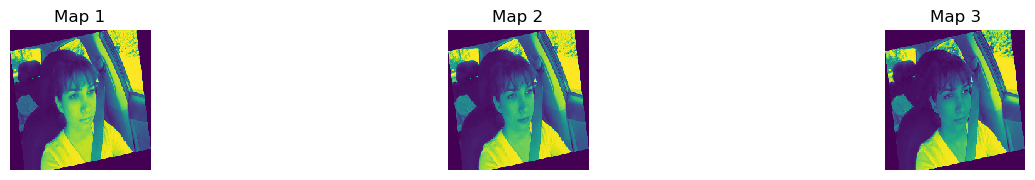

Visualizing feature maps for normalization:


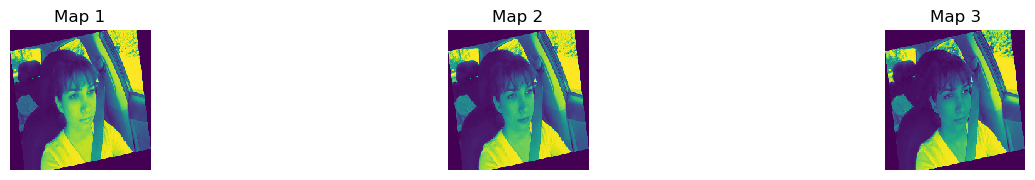

Visualizing feature maps for stem_conv_pad:


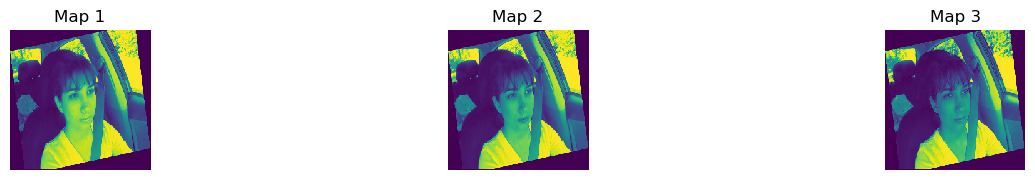

Visualizing feature maps for stem_conv:


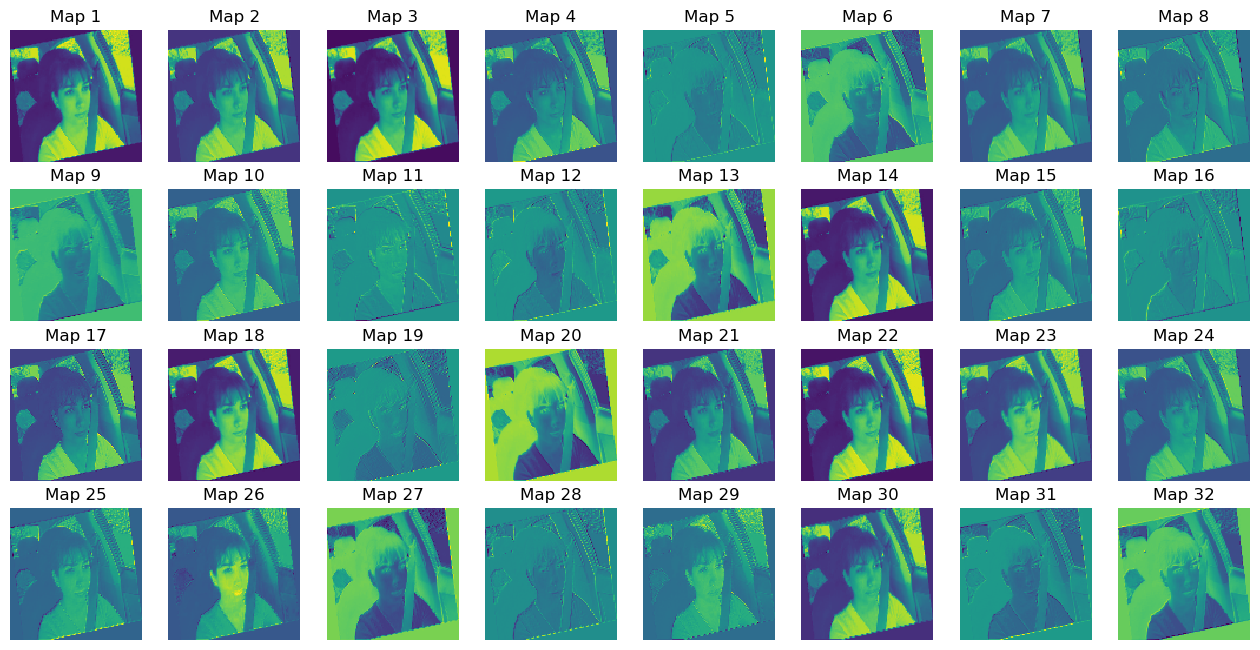

Visualizing feature maps for stem_bn:


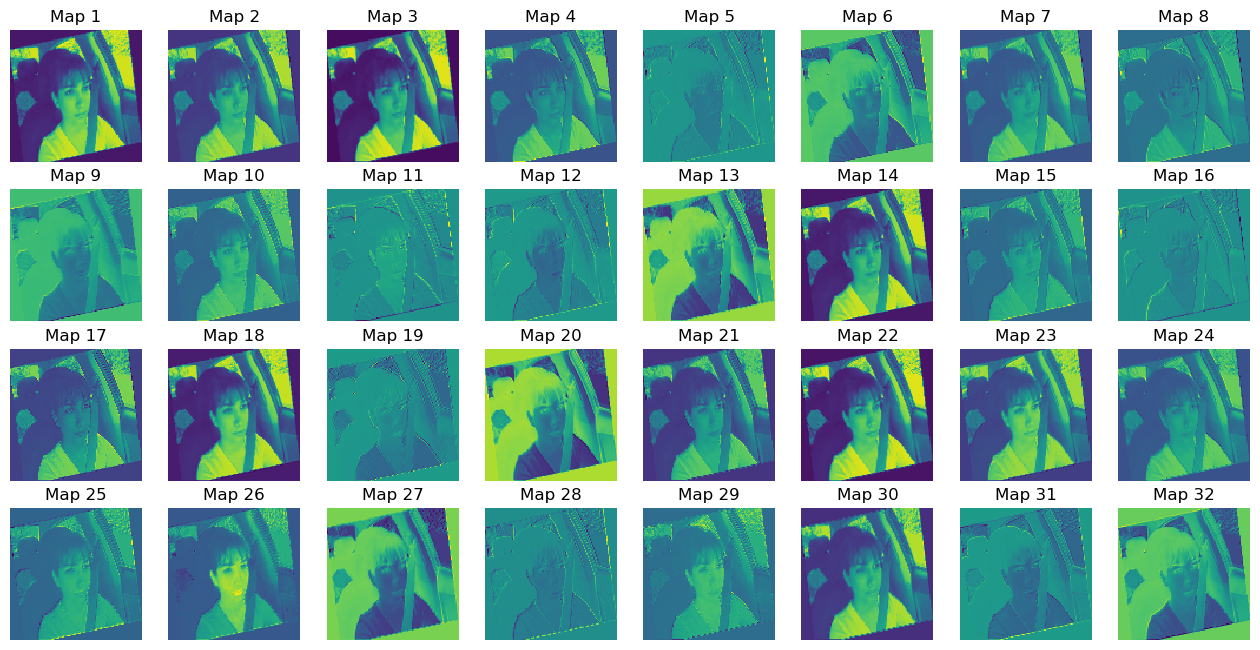

Visualizing feature maps for stem_activation:


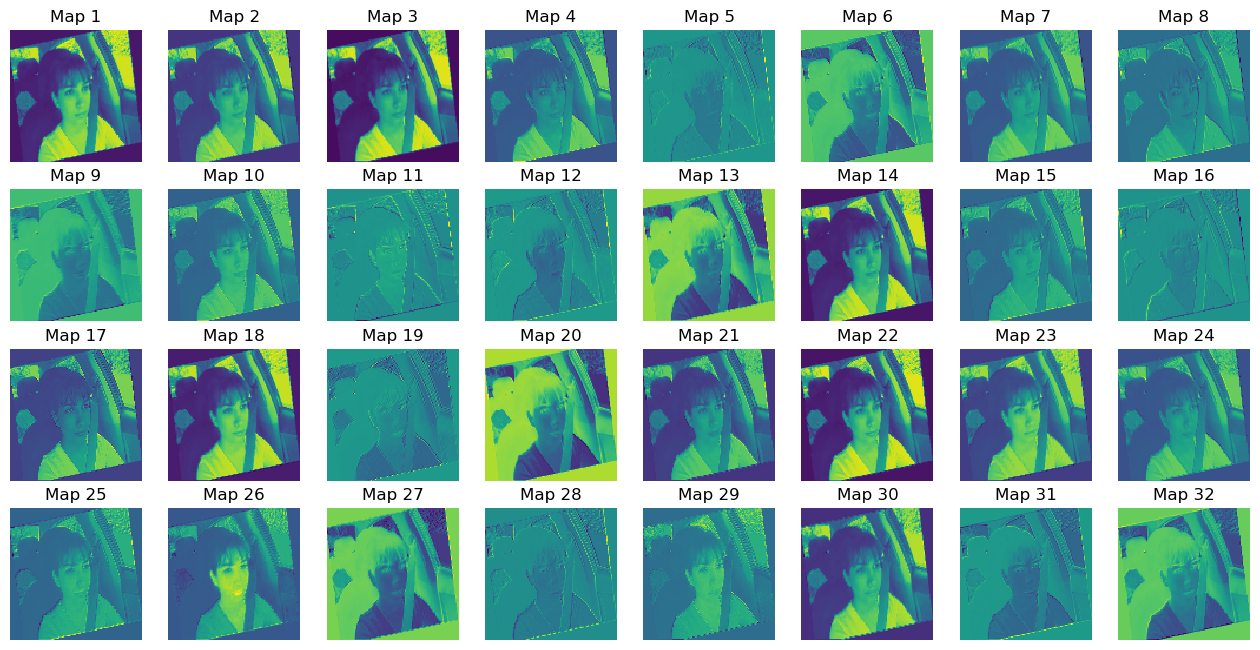

Visualizing feature maps for block1a_dwconv:


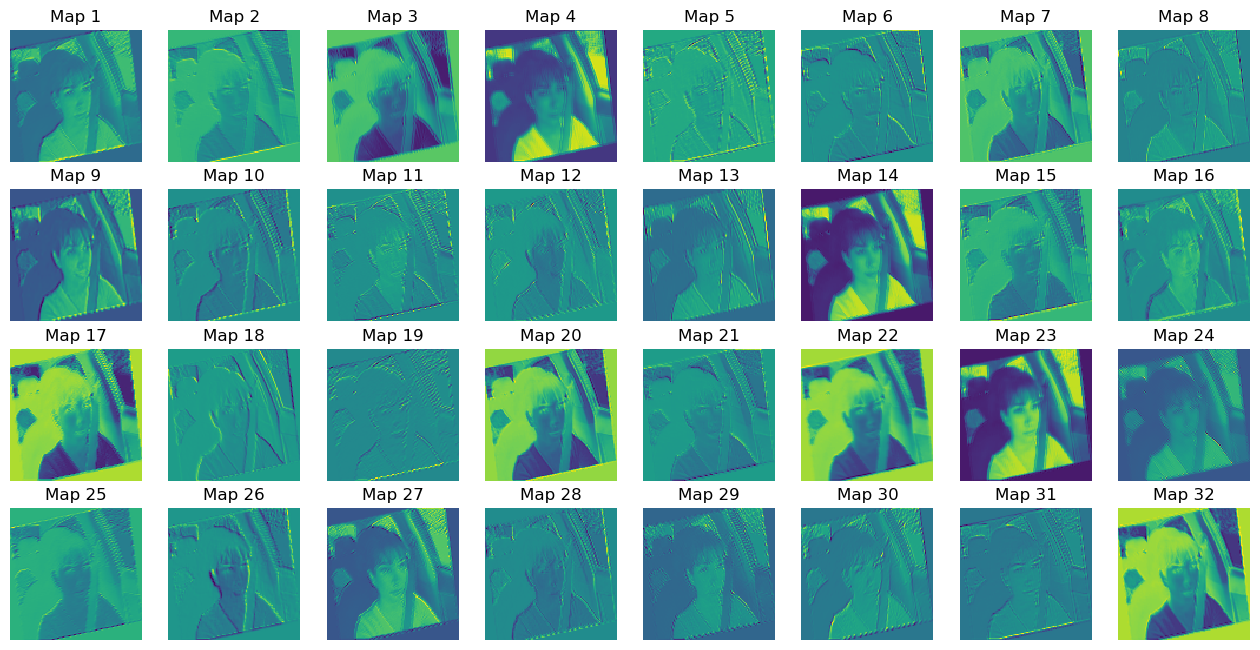

Visualizing feature maps for block1a_bn:


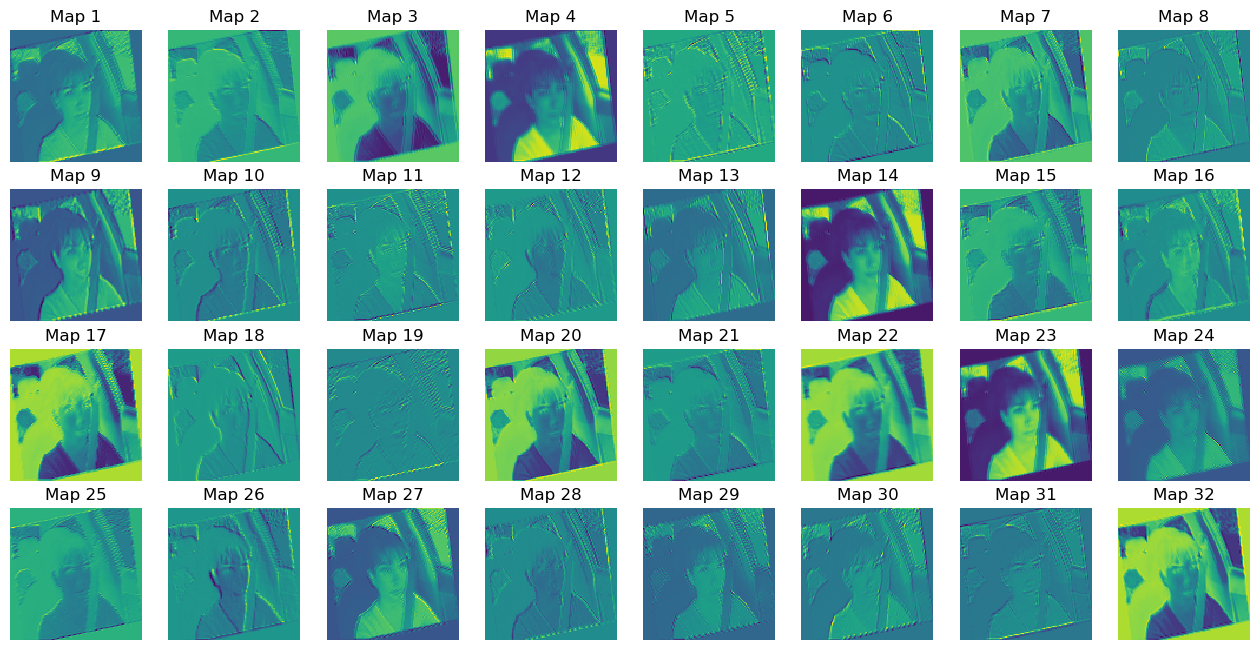

Visualizing feature maps for block1a_activation:


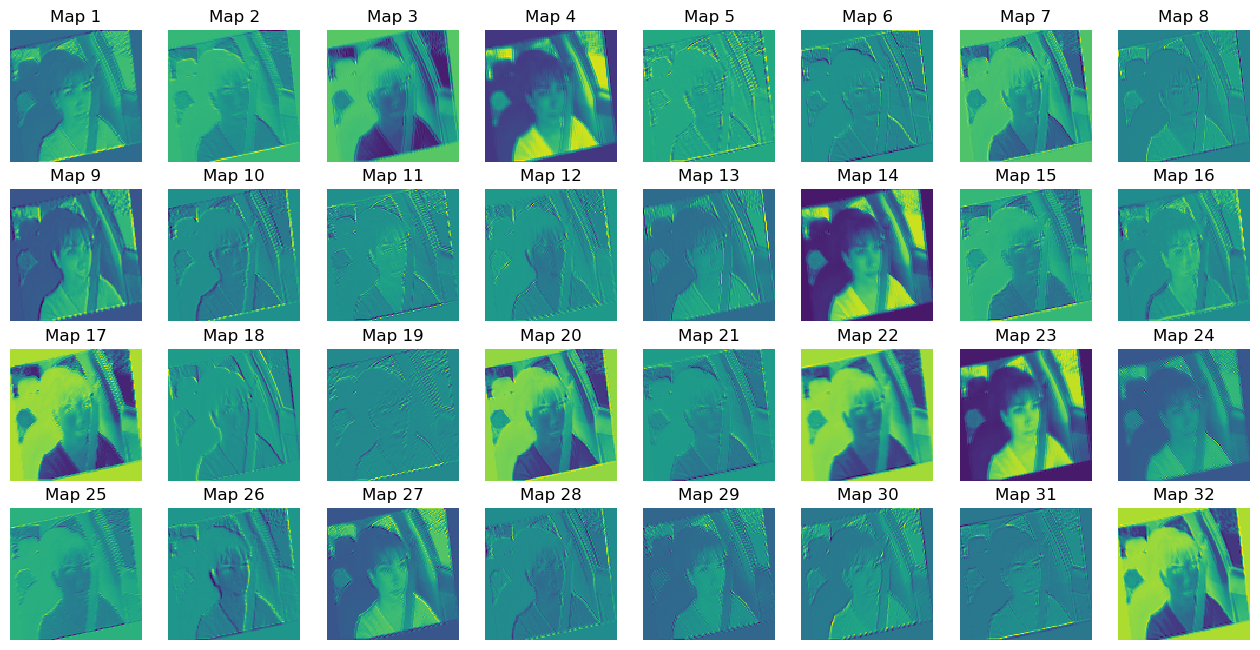

Visualizing feature maps for block1a_se_squeeze:


IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

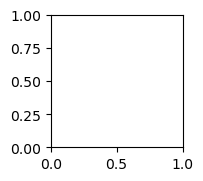

In [ ]:
import numpy as np

# Select random 2-3 images from your test dataset
num_images = 3
random_indices = np.random.choice(len(test_generator), num_images, replace=False)
sample_images = [test_generator[i][0][0] for i in random_indices]  # Grabbing the first batch and the first image from each batch



# Define a new model to extract feature maps from all layers
feature_extraction_model = Model(inputs=base_model_scratch.input,
                                  outputs=[layer.output for layer in base_model_scratch.layers])

# Extract feature maps for the selected images
feature_maps_list = feature_extraction_model.predict(np.array(sample_images))

# Plot feature maps for each layer and each image
for layer_index, feature_maps in enumerate(feature_maps_list):
    layer_name = base_model_scratch.layers[layer_index].name
    print(f"Visualizing feature maps for {layer_name}:")
    num_maps = feature_maps.shape[-1]
    num_cols = min(8, num_maps)  # Maximum 8 columns
    num_rows = (num_maps // num_cols) + 1
    plt.figure(figsize=(16, 2 * num_rows))
    for j in range(num_maps):
        plt.subplot(num_rows, num_cols, j+1)
        plt.imshow(feature_maps[0, :, :, j], cmap='viridis', interpolation='nearest')  # Visualize only the first image
        plt.title(f'Map {j+1}')
        plt.axis('off')
    plt.show()




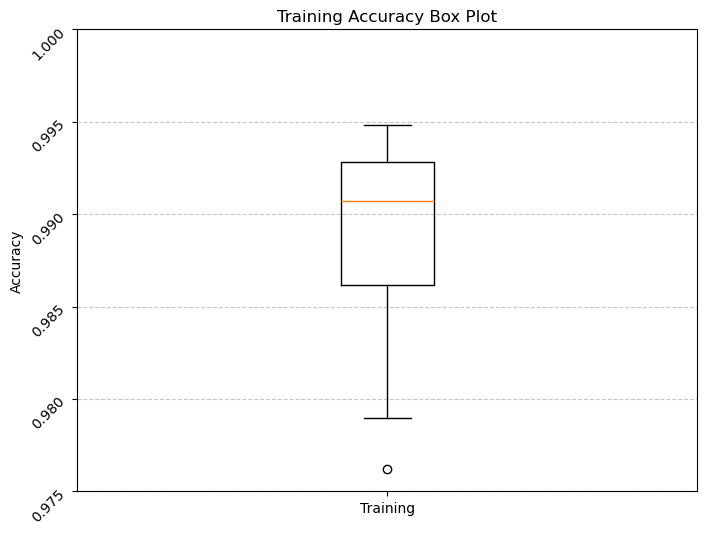

Q1 (25th percentile): 0.9861873984336853
Q3 (75th percentile): 0.9928232431411743
Interquartile Range (IQR): 0.006635844707489014
Whisker (Low): 0.9762336313724518
Whisker (High): 1.0027770102024078
Outliers: [0.811865508556366, 0.9311865568161011, 0.9547345638275146, 0.9677982926368713, 0.9717923402786255, 0.9762023687362671]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract accuracy values from history_transfer
train_accuracy = history_transfer.history['accuracy']

# Calculate quartiles (Q1 and Q3)
q1 = np.percentile(train_accuracy, 25)
q3 = np.percentile(train_accuracy, 75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate whiskers (1.5 * IQR)
whisker_low = q1 - 1.5 * iqr
whisker_high = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in train_accuracy if x < whisker_low or x > whisker_high]

# Plotting box plot
plt.figure(figsize=(8, 6))
plt.boxplot(train_accuracy)
plt.title('Training Accuracy Box Plot')
plt.ylabel('Accuracy')

# Set y-axis limits to focus on the range 0.975 to 1.000
plt.ylim(0.975, 1.0)

# Add grid lines within the specified range
plt.yticks(np.arange(0.975, 1.001, 0.005), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks([1], ['Training'])
plt.show()

# Print the calculated statistics
print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)
print("Interquartile Range (IQR):", iqr)
print("Whisker (Low):", whisker_low)
print("Whisker (High):", whisker_high)
print("Outliers:", outliers)


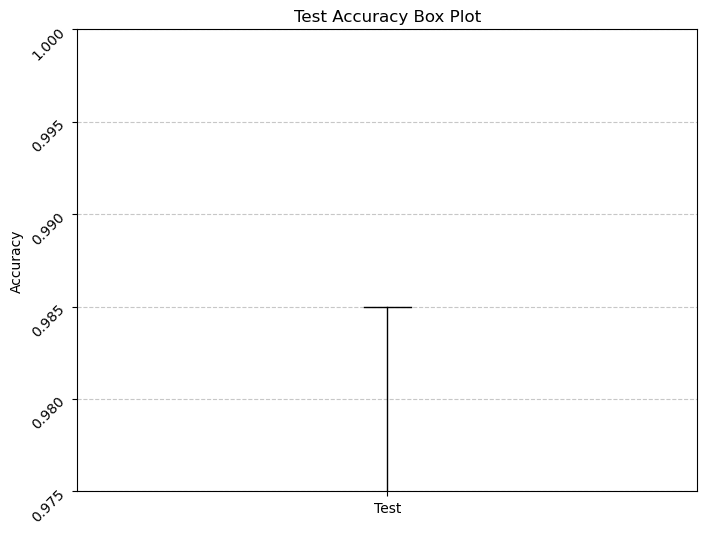

Q1 (25th percentile): 0.8856249898672104
Q3 (75th percentile): 0.9725000262260437
Interquartile Range (IQR): 0.08687503635883331
Whisker (Low): 0.7553124353289604
Whisker (High): 1.1028125807642937
Outliers: [0.7212499976158142, 0.46875, 0.6537500023841858, 0.5975000262260437, 0.7237499952316284, 0.7400000095367432, 0.6949999928474426]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract accuracy values from history_transfer
test_accuracy = history_transfer.history['val_accuracy']

# Calculate quartiles (Q1 and Q3)
q1 = np.percentile(test_accuracy, 25)
q3 = np.percentile(test_accuracy, 75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Calculate whiskers (1.5 * IQR)
whisker_low = q1 - 1.5 * iqr
whisker_high = q3 + 1.5 * iqr

# Identify outliers
outliers = [x for x in test_accuracy if x < whisker_low or x > whisker_high]

# Plotting box plot
plt.figure(figsize=(8, 6))
plt.boxplot(test_accuracy)
plt.title('Test Accuracy Box Plot')
plt.ylabel('Accuracy')

# Set y-axis limits to focus on the range 0.975 to 1.000
plt.ylim(0.975, 1.0)

# Add grid lines within the specified range
plt.yticks(np.arange(0.975, 1.001, 0.005), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks([1], ['Test'])
plt.show()

# Print the calculated statistics
print("Q1 (25th percentile):", q1)
print("Q3 (75th percentile):", q3)
print("Interquartile Range (IQR):", iqr)
print("Whisker (Low):", whisker_low)
print("Whisker (High):", whisker_high)
print("Outliers:", outliers)


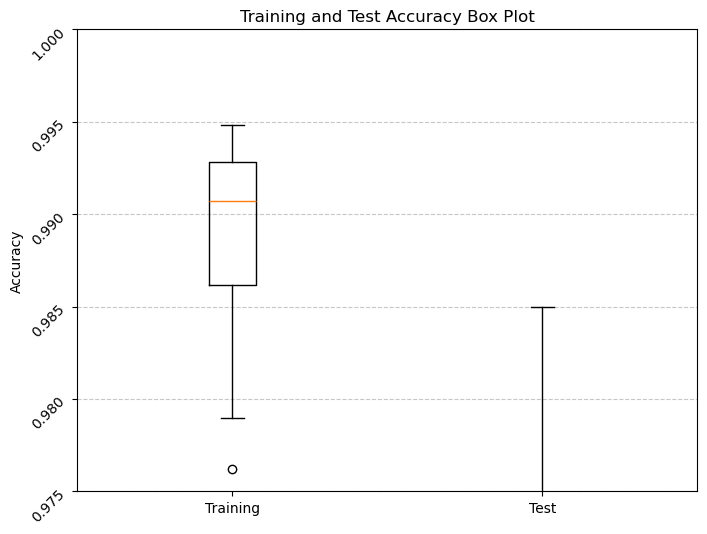

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract accuracy values from history_transfer
train_accuracy = history_transfer.history['accuracy']
test_accuracy = history_transfer.history['val_accuracy']

# Combine accuracy values
combined_accuracy = [train_accuracy, test_accuracy]

# Plotting box plot
plt.figure(figsize=(8, 6))
plt.boxplot(combined_accuracy, labels=['Training', 'Test'])
plt.title('Training and Test Accuracy Box Plot')
plt.ylabel('Accuracy')
plt.ylim(0.975, 1.0)  # Set y-axis limits to focus on the range 0.975 to 1.000
plt.yticks(np.arange(0.975, 1.001, 0.005), rotation=45)  # Add grid lines within the specified range
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
